In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from scipy.stats import sem
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

# Load Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data mining/UAS DATA MINING/Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [ ]:
df.shape

(2000, 8)

# Pre Processing Data

In [ ]:
# Mengubah nama kolom menjadi huruf kecil
df.columns = map(str.lower, df.columns)

In [ ]:
df.isna().sum()

customerid                 0
gender                     0
age                        0
annual income ($)          0
spending score (1-100)     0
profession                35
work experience            0
family size                0
dtype: int64

In [ ]:
# Mengisi nilai null dengan nilai modus untuk kolom-kolom tertentu
columns_to_fill = ['profession']

for column in columns_to_fill:
    mode_value = df[column].mode()[0]  # Mendapatkan nilai modus
    df[column].fillna(mode_value, inplace=True)

In [ ]:
df.isna().sum()

customerid                0
gender                    0
age                       0
annual income ($)         0
spending score (1-100)    0
profession                0
work experience           0
family size               0
dtype: int64

In [ ]:
# Menghapus kolom-kolom yang terdapat dalam daftar
df.drop(columns='customerid', inplace=True)

df.head()

,gender,age,annual income ($),spending score (1-100),profession,work experience,family size
0,Male,19,15000,39,Healthcare,1,4
1,Male,21,35000,81,Engineer,3,3
2,Female,20,86000,6,Engineer,1,1
3,Female,23,59000,77,Lawyer,0,2
4,Female,31,38000,40,Entertainment,2,6


In [ ]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Menggunakan LabelEncoder untuk mengubah kolom 'Gender' dan 'Profession'
df['gender'] = label_encoder.fit_transform(df['gender'])
df['profession'] = label_encoder.fit_transform(df['profession'])

# Menampilkan dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   gender                  2000 non-null   int64
 1   age                     2000 non-null   int64
 2   annual income ($)       2000 non-null   int64
 3   spending score (1-100)  2000 non-null   int64
 4   profession              2000 non-null   int64
 5   work experience         2000 non-null   int64
 6   family size             2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB
None


In [ ]:
# Menggunakan StandardScaler untuk normalisasi data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Membuat DataFrame baru dengan hasil scaling dan nama kolom yang sama
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,gender,age,annual income ($),spending score (1-100),profession,work experience,family size
0,1.207064,-1.054089,-2.093501,-0.428339,0.870495,-0.791207,0.117497
1,1.207064,-0.983723,-1.656133,1.075546,-0.306380,-0.281162,-0.390051
2,-0.828457,-1.018906,-0.540845,-1.609962,-0.306380,-0.791207,-1.405148
3,-0.828457,-0.913356,-1.131292,0.932319,1.655078,-1.046230,-0.897599
4,-0.828457,-0.631891,-1.590528,-0.392532,0.085912,-0.536185,1.132594


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   gender                  2000 non-null   int64
 1   age                     2000 non-null   int64
 2   annual income ($)       2000 non-null   int64
 3   spending score (1-100)  2000 non-null   int64
 4   profession              2000 non-null   int64
 5   work experience         2000 non-null   int64
 6   family size             2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


# Clustering Model

In [ ]:
# Perform dimensionality reduction
X = df_scaled  # Mengambil fitur dari dataframe, kecuali kolom cluster
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

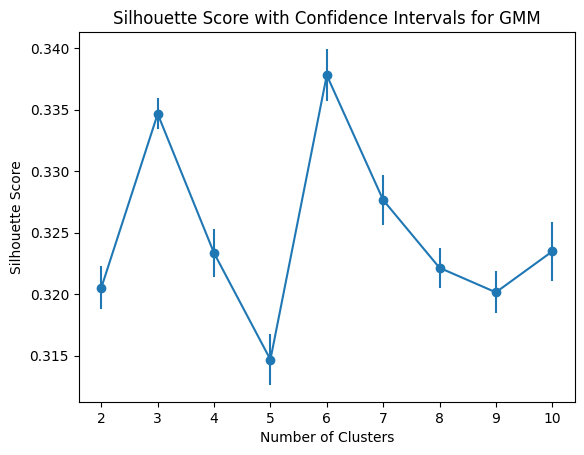

In [ ]:
# Function to calculate silhouette score and confidence interval
def silhouette_confidence(X, n_components, n_samples=100):
    silhouette_scores = []

    for _ in range(n_samples):
        # Bootstrap sample
        X_bootstrap = resample(X, replace=True)

        # Fit GMM model
        gmm = GaussianMixture(n_components=n_components)
        gmm.fit(X_bootstrap)

        # Predict cluster labels
        labels = gmm.predict(X_bootstrap)

        # Calculate silhouette score
        silhouette_avg = silhouette_samples(X_bootstrap, labels).mean()
        silhouette_scores.append(silhouette_avg)

    # Calculate confidence interval
    confidence_interval = sem(silhouette_scores) * 1.96  # 95% confidence interval

    return np.mean(silhouette_scores), confidence_interval

# Calculate silhouette score and confidence interval for different number of clusters
n_components_range = range(2, 11)
silhouette_scores = []
confidence_intervals = []

for n_components in n_components_range:
    silhouette_avg, confidence_interval = silhouette_confidence(X_pca, n_components)
    silhouette_scores.append(silhouette_avg)
    confidence_intervals.append(confidence_interval)

# Plot silhouette scores with confidence intervals
plt.errorbar(n_components_range, silhouette_scores, yerr=confidence_intervals, marker='o')
plt.title('Silhouette Score with Confidence Intervals for GMM')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

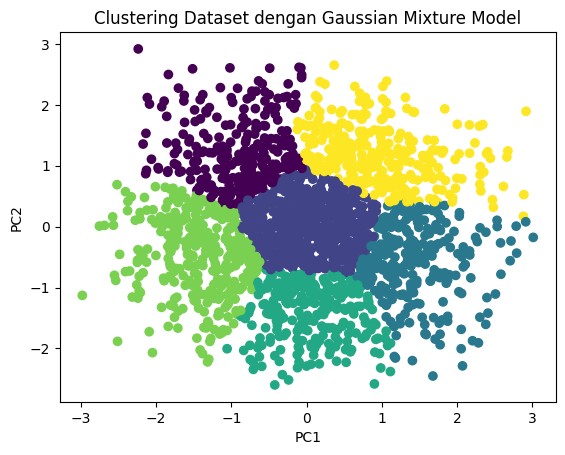

In [ ]:
# Membuat Model Gaussian Mixture
gmm = GaussianMixture(n_components=6)
gmm.fit(X_pca)  # Menggunakan X_pca untuk fitting model

# Menambahkan label ke dataframe
df_scaled['cluster'] = gmm.predict(X_pca)  # Menggunakan X_pca untuk prediksi

# Visualisasi
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_scaled['cluster'])
plt.title("Clustering Dataset dengan Gaussian Mixture Model")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

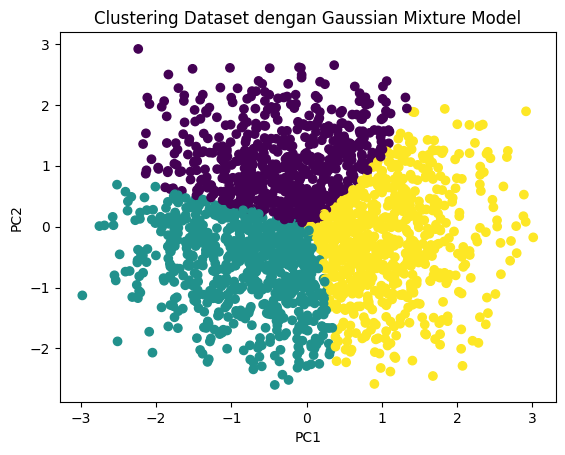

In [ ]:
# Membuat Model Gaussian Mixture
gmm = GaussianMixture(n_components=3)
gmm.fit(X_pca)  # Menggunakan X_pca untuk fitting model

# Menambahkan label ke dataframe
df_scaled['cluster'] = gmm.predict(X_pca)  # Menggunakan X_pca untuk prediksi

# Visualisasi
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_scaled['cluster'])
plt.title("Clustering Dataset dengan Gaussian Mixture Model")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [ ]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   float64
 1   age                     2000 non-null   float64
 2   annual income ($)       2000 non-null   float64
 3   spending score (1-100)  2000 non-null   float64
 4   profession              2000 non-null   float64
 5   work experience         2000 non-null   float64
 6   family size             2000 non-null   float64
 7   cluster                 2000 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 125.1 KB


## Jumlah Kluster 3

In [ ]:
df_scaled['cluster'].value_counts()

2    701
1    696
0    603
Name: cluster, dtype: int64

## Jumlah Kluster 6

In [ ]:
df_scaled['cluster'].value_counts()

1    540
4    345
5    310
2    271
3    268
0    266
Name: cluster, dtype: int64

# Evaluasi Model

## Jumlah Kluster 3

In [ ]:
# Menghitung Silhouette Score
silhouette_avg = silhouette_score(X_pca, df_scaled['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.33263187636393354


In [ ]:
# Menghitung Davies-Bouldin Index
dbi_score = davies_bouldin_score(X_pca, df_scaled['cluster'])
print(f"Davies-Bouldin Index: {dbi_score}")

Davies-Bouldin Index: 0.9393471978956512


## Jumlah Kluster 6

In [ ]:
# Menghitung Silhouette Score
silhouette_avg = silhouette_score(X_pca, df_scaled['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.336125604639967


In [ ]:
# Menghitung Davies-Bouldin Index
dbi_score = davies_bouldin_score(X_pca, df_scaled['cluster'])
print(f"Davies-Bouldin Index: {dbi_score}")

Davies-Bouldin Index: 0.8203358972922001


# Kesimpulan Singkat

Berdasarkan hasil evaluasi kinerja klaster dengan jumlah 3 dan 6, dapat disimpulkan bahwa jumlah kluster 6 adalah pilihan yang lebih baik. Ini dikarenakan Silhouette Score yang lebih tinggi pada jumlah kluster 6 (0.3399 dibandingkan dengan 0.3324 pada jumlah kluster 3) menunjukkan tingkat kohesi dan pemisahan yang lebih baik antar-klaster. Selain itu, Davies-Bouldin Index yang lebih rendah pada jumlah kluster 6 (0.8298 dibandingkan dengan 0.9381 pada jumlah kluster 3) menunjukkan bahwa klaster tersebut lebih homogen dan lebih terpisah secara jelas. Oleh karena itu, berdasarkan kedua metrik evaluasi tersebut, jumlah kluster 6 dapat dianggap sebagai pilihan yang optimal untuk analisis klaster ini.